In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle
def generate(N,M,L):
    PWM = np.random.dirichlet(np.ones(4), size=(M,))
    PWM = torch.from_numpy(PWM)
    bg = torch.ones(L-M, 4) / 4
    positions = torch.randint(low=0, high=L-M+1, size=(N,))[:,None]
    positions_aug = torch.cat([positions + i for i in range(M)], dim=-1)

    prob = torch.ones(size=(N, L, 4), dtype=torch.float64) / 4.0
    prob = prob.scatter(dim=1, index=positions_aug.unsqueeze(-1).repeat(1,1,4), src=PWM.unsqueeze(0).repeat(N,1,1)).contiguous()
    seq = torch.multinomial(prob.reshape(shape=(N*L, 4)), num_samples=1).reshape(shape=(N,L)) ##the DNA sequence
    return seq, PWM, positions

/opt/anaconda3/envs/phy/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


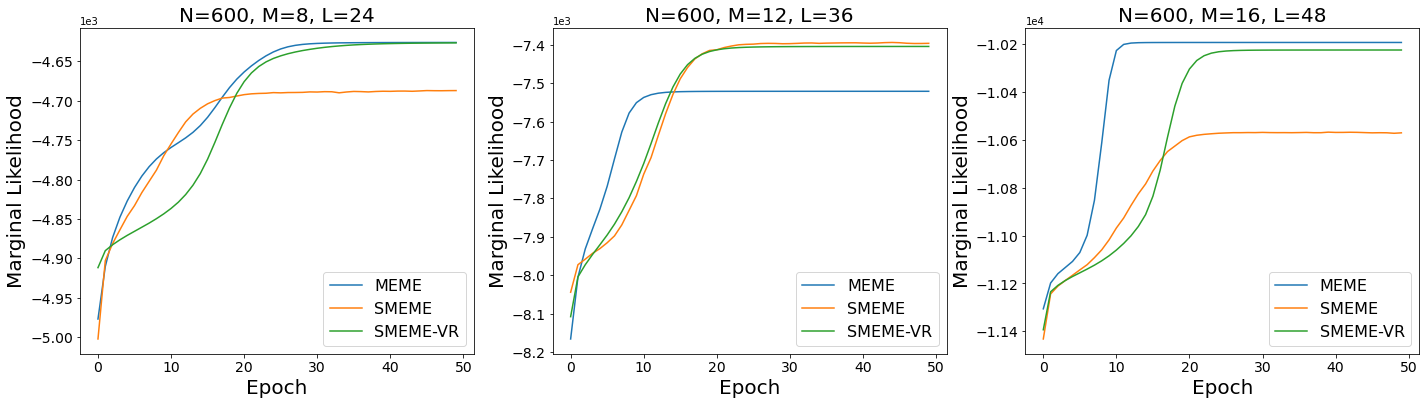

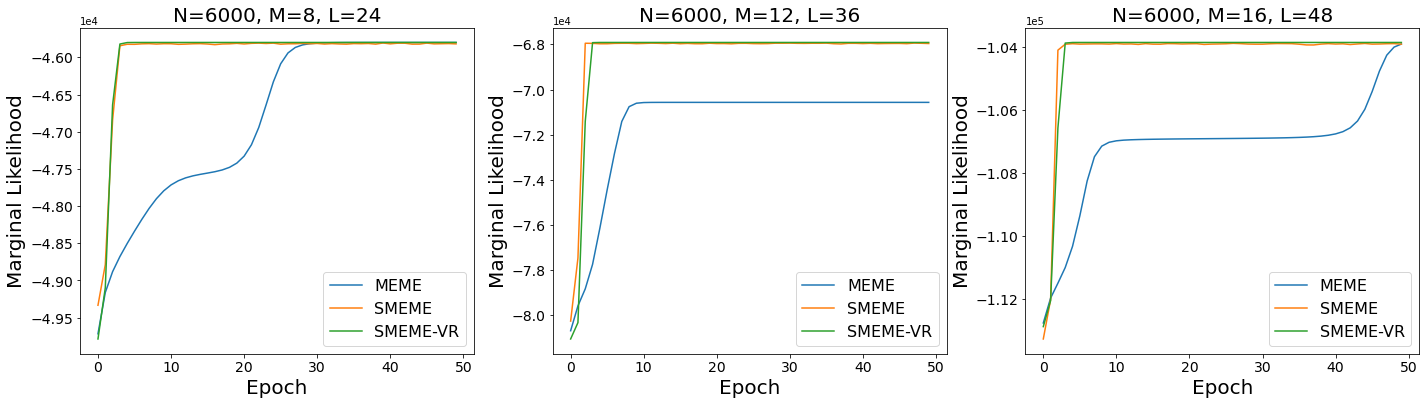

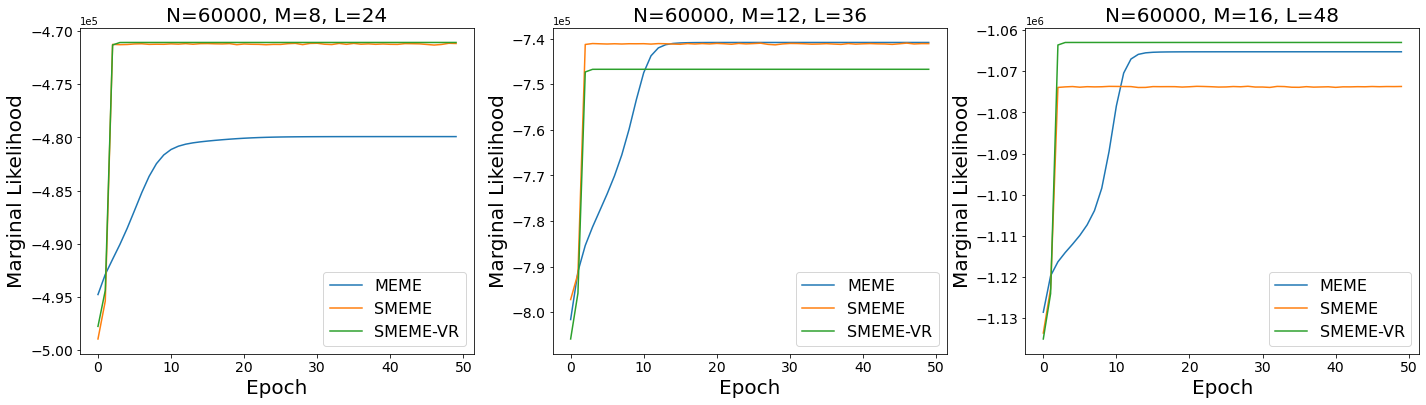

In [23]:
for N in [600, 6000, 60000]:
    plt.figure(figsize=(24, 6))
    for M, L in [(8,24), (12, 36), (16, 48)]:
        paths = ['results/MEME/LLs_{}_{}_{}.pkl'.format(N, M, L),
        'results/SMEME/LLs_{}_{}_{}.pkl'.format(N, M, L),
        'results/SMEME-VR/LLs_{}_{}_{}.pkl'.format(N, M, L)
        ]
        LLs_lst = []
        for path in paths:
            with open(path, 'rb') as f:
                LLs = pickle.load(f)
                LLs_lst.append(LLs)
        plt.subplot(1,3,(M-4)//4)
        plt.ticklabel_format(style='sci',scilimits=(-1,2), axis='y')
        plt.tick_params(axis='both',  labelsize=14)
        plt.title('N={}, M={}, L={}'.format(N,M,L), fontsize=20)
        plt.xlabel('Epoch',fontsize=20)
        plt.ylabel('Marginal Likelihood', fontsize=20)
        plt.plot(LLs_lst[0][:50], label='MEME')
        plt.plot(LLs_lst[1][:50], label='SMEME')
        plt.plot(LLs_lst[2][:50], label='SMEME-VR')
        plt.legend(fontsize=16)
        
    plt.savefig('tex/figures/{}.png'.format(N),pad_inches = 0 )

In [6]:
for N in [600, 6000, 60000]:
    for method in ['MEME', 'SMEME', 'SMEME-VR']:
        print(method, end='&')
        for M, L in [(8,24), (12, 36), (16, 48)]:
            path = 'results/{}/LLs_{}_{}_{}.pkl'.format(method, N, M, L)
            with open(path, 'rb') as f:
                LLs = pickle.load(f)
            print('${:.02f}$'.format(LLs[-1]), end='&')
        for M, L in [(8,24), (12, 36), (16, 48)]:
            torch.manual_seed(2022)
            np.random.seed(2022)
            seq, PWM, positions = generate(N,M,L)
            path = 'results/{}/PWM_{}_{}_{}.pt'.format(method, N, M, L)
            PWM_est = torch.load(path)
            PWM_est = PWM_est / torch.sum(PWM_est, dim=-1,keepdim=True)
            kl = torch.sum(PWM * torch.log(PWM / PWM_est))
            print('${:.02f}$'.format(kl.item()), end='&')
        print('')

MEME&$-4625.99$&$-7521.33$&$-10192.04$&$0.10$&$8.09$&$27.76$&
SMEME&$-4686.88$&$-7394.96$&$-10569.14$&$6.98$&$8.91$&$9.93$&
SMEME-VR&$-4626.00$&$-7404.53$&$-10223.58$&$0.08$&$8.96$&$12.09$&
MEME&$-45799.14$&$-70569.73$&$-103855.05$&$9.29$&$7.46$&$8.50$&
SMEME&$-45813.09$&$-67970.39$&$-103905.76$&$9.34$&$12.54$&$8.66$&
SMEME-VR&$-45799.14$&$-67917.66$&$-103855.05$&$9.29$&$12.60$&$8.50$&
MEME&$-479919.01$&$-740855.99$&$-1065214.82$&$5.08$&$10.50$&$10.53$&
SMEME&$-471161.79$&$-741100.43$&$-1073672.35$&$5.27$&$10.83$&$10.90$&
SMEME-VR&$-471058.57$&$-746733.40$&$-1062944.85$&$5.20$&$5.68$&$8.26$&
